# Import libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Load training and testing datasets

In [13]:
base_path = "/content/"

train_df = pd.read_csv(base_path+'train_set.csv')
test_df = pd.read_csv(base_path+'test_set.csv')

# Prepare the data


In [14]:
max_features = 2000
max_len = 100

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train_df['text'].values)

train_sequences = tokenizer.texts_to_sequences(train_df['text'].values)
train_data = pad_sequences(train_sequences, maxlen=max_len)

test_sequences = tokenizer.texts_to_sequences(test_df['text'].values)
test_data = pad_sequences(test_sequences, maxlen=max_len)

train_labels = train_df['class'].values
test_labels = test_df['class'].values

# Define the model

In [15]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model

In [16]:
history = model.fit(train_data, train_labels, validation_split=0.2, epochs=20, batch_size=64)


Epoch 1/20
157/157 [==============================] - 81s 488ms/step - loss: 0.6342 - accuracy: 0.6421 - val_loss: 0.6199 - val_accuracy: 0.6636
Epoch 2/20
157/157 [==============================] - 75s 475ms/step - loss: 0.5852 - accuracy: 0.6901 - val_loss: 0.6203 - val_accuracy: 0.6640
Epoch 3/20
157/157 [==============================] - 75s 478ms/step - loss: 0.5507 - accuracy: 0.7158 - val_loss: 0.6443 - val_accuracy: 0.6456
Epoch 4/20
157/157 [==============================] - 76s 485ms/step - loss: 0.5173 - accuracy: 0.7377 - val_loss: 0.6760 - val_accuracy: 0.6380
Epoch 5/20
157/157 [==============================] - 75s 476ms/step - loss: 0.4874 - accuracy: 0.7614 - val_loss: 0.7065 - val_accuracy: 0.6215
Epoch 6/20
157/157 [==============================] - 77s 489ms/step - loss: 0.4604 - accuracy: 0.7725 - val_loss: 0.7453 - val_accuracy: 0.6111
Epoch 7/20
157/157 [==============================] - 76s 482ms/step - loss: 0.4286 - accuracy: 0.7932 - val_loss: 0.8038 - val_ac

# Plot the graph of epoch vs loss


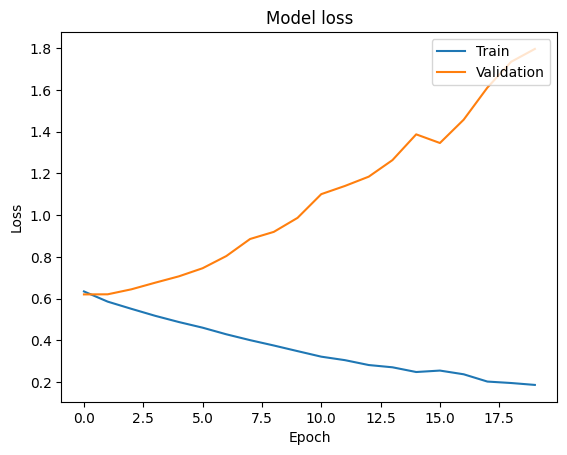

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model on the test data

In [18]:
score, acc = model.evaluate(test_data, test_labels, batch_size=64)

print('Test score:', score)
print('Test accuracy:', acc)

77/77 [==============================] - 6s 79ms/step - loss: 1.1149 - accuracy: 0.7148
Test score: 1.114925503730774
Test accuracy: 0.7148140668869019


# Save the model

In [19]:
model.save(base_path+'rnn_test_00.h5')